# Simple Graph

No LLM here!

Important components

- Nodes -> Python Functions -> Task
- Edges -> Connects the nodes
  - Conditional edges are routes between nodes
- State: State Schema serves as the input for nodes and edges
- State Graph: Structure of the entire graph

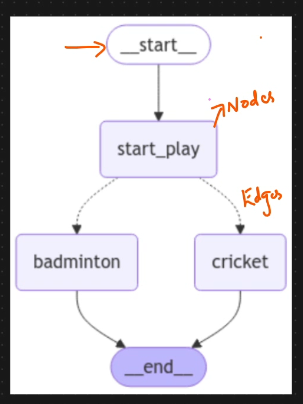

In [1]:
### Build a simple workflow

### Define State
# We will use the TypedDice from typing for the sate


In [2]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info: str

#### Nodes

These are the python functions. The argument is the state schema

In [ ]:
# Nodes
def start_play(state:State):
    print("Start_Play has been called.")
    return {"graph_info":state['graph_info'] + "I am planning to play"}

def cricket(state:State):
    print("My Cricket node has been called")
    return {"graph_info":state['graph_info'] + " Cricket"}

def badminton(state:State):
    print("My Badminton node has been called")
    return {"graph_info":state['graph_info'] + " Badminton"}


In [6]:
# This will select the node
import random
from typing import Literal

def random_play(state:State) -> Literal['cricket','badminton']:
    graph_info = state['graph_info']
    
    if random.random() > 0.5:
        return "cricket"
    else:
        return "badminton"

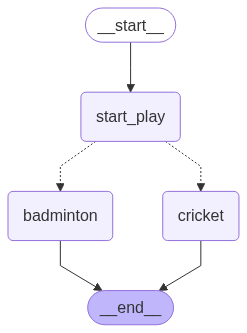

In [8]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

##### Build the graph
graph = StateGraph(State)

##### Add the nodes
graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("badminton", badminton)

##### Graph flow
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("cricket", END)
graph.add_edge("badminton", END)

##### Compile the graph
graph_builder = graph.compile()

##### View
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [11]:
##### Graph Invocation

graph_builder.invoke({"graph_info":"My name is Jon"})

Start_Play has been called.
My Cricket node has been called


{'graph_info': 'My name is JonI am planning to play Cricket'}